<h2 style="color:#006400;font-weight:bold; font-family: Open Sans, sans-serif; margin-bottom:5px;"> Demographic Influences on Metabolic Syndrome</h2>
<h5 style="color:green;margin-top:0px">Analyzing the relationships between Income, Age, Race, and Gender and Likelihood of Occurrence</h5>
<h5> By Amandeep Singh</h5>

<h2 style="color:#006400;font-weight:bold; font-family: Open Sans, sans-serif; margin-bottom:5px;"> Introduction</h2>
<p style="font-size:medium">Metabolic syndrome is an accumulation of several disorders, which together raise the risk of an individual developing atherosclerotic cardiovascular disease, insulin resistance, and diabetes mellitus, and vascular and neurological complications such as a cerebrovascular accident.

The repercussions of metabolic syndrome extend beyond immediate health concerns, serving as a precursor to more severe conditions such as type 2 diabetes and cardiovascular diseases. As a pervasive health issue, particularly prevalent among U.S. adults, it has garnered global attention due to its association with increased morbidity and mortality rates.

Various factors come into play in determining an individual's susceptibility to metabolic syndrome. Notably, blood glucose levels, triglyceride levels, and high-density lipoprotein (HDL) cholesterol levels are key indicators.
In this study, We will understand how factors like age, income, race, and gender relate to metabolic syndrome. By doing this, we hope to learn more about how individual health indicators and demographic factors interact. 
</p>
<div style="margin-left: auto;
  margin-right: auto;
  width: 75%;">
<img src="https://th.bing.com/th/id/R.ed1177a1cd0846738e90cf1d809414f1?rik=c8I80ndq7mkC7w&riu=http%3a%2f%2fwww.thelancet.com%2fcms%2fattachment%2f2001025574%2f2003896319%2fgr1_lrg.jpg&ehk=stpKRRpWviI5YvjJeW%2bU3xv68GALbm2mKkREYPOV%2fCY%3d&risl=&pid=ImgRaw&r=0" alt="biological factor for The syndrome " width="54%" height="50%" style=" border:5px solid black;" margin="20px">
<img src="https://jamestownspine.com/wp-content/uploads/2019/09/What-is-Metabolic-Syndrome-300x300.jpg" alt="biological factor for The syndrome " width="40%" height="50%" style="border:5px solid black;" margin="20px">
</div>
<h5 style="color:#1E90FF;font-weight:bold">What question this study is going to explore and try to answer:</h5>
<ol style="font-size:medium">
<li>Does Income has any relation with development of metabiolic syndrome?</li>
<li>Does gender have any influence overall?</li>
<li>Does age has any influence on it and what biological factor changes most with age which can change the likehood of developing the Syndrome</li>
<li>Does Race of person affects the chances of developing the syndrome? Does different gender in different races have different impacts on the likelihood of developing the syndrome?  </li>
</ol>

<p style="font-size:medium">The data for the study is taken from Kaggle and the original data is from https://www.cdc.gov/nchs/nhanes/index.html. Center for Disease control and Prevention do surveys under national Center for health statics and provide data on it's website. The units for the measurement of blood glucose, triglycerides, HDL, Uric Acid in the given data are mmol/L, mmol/L, mmol/L and micromol/L. The normal ranges for blood Glucose is 3.9 to 7.8 mmol/L, for HDL it's 1.3 mmolfor female and 1,0 mmol/L for males, for Triglyecerides it's less than 1.7 mmol/L. The normal range for Uric acid can vary depending on the lab, but it’s typically around 150 to 500 µmol/L for men and 75 to 350 µmol/L for women. The income in the data is monthly income for the family. The 0 in data denotes that the person don't have metabolic syndrome and 1 denotes that person have metabolic syndrome. </p>

<h2 style="color:#006400;font-weight:bold; font-family: Open Sans, sans-serif; margin-bottom:5px;">Analyses<h2>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the data from local csv file to pandas dataframe
df=pd.read_csv("Metabolic Syndrome.csv")
df.head()



,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


<h5 style="color:#1E90FF;font-weight:bold">Cleaning the data</h5>
<p style="font-size:medium">Our data might contains some missing value as well as some columns which we are not going to need for this analysis so we am going to check for null value, going to drop the columns we don't need, and then going to drop the null values. In the end, we'll print top five columns to see how our data frame looks.</p>

In [56]:
#checking if there is any null data
df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [57]:
#dropping the columns we don't need
df=df.drop(['Marital','seqn','Albuminuria','UrAlbCr', 'UricAcid','WaistCirc','BMI'],axis=1)
#dropping the null values
df=df.dropna()
df.head()


,Age,Sex,Income,Race,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,8200.0,White,92,41,84,0
1,44,Female,4500.0,White,82,28,56,0
2,21,Male,800.0,Asian,107,43,78,0
3,43,Female,2000.0,Black,104,73,141,0
5,80,Male,300.0,White,105,47,100,0


<p style="font-size:medium"> Over here I am going to check the distribution of the data, This will help me to understand how age, Income are distributed and how much data we have for each race.</p>

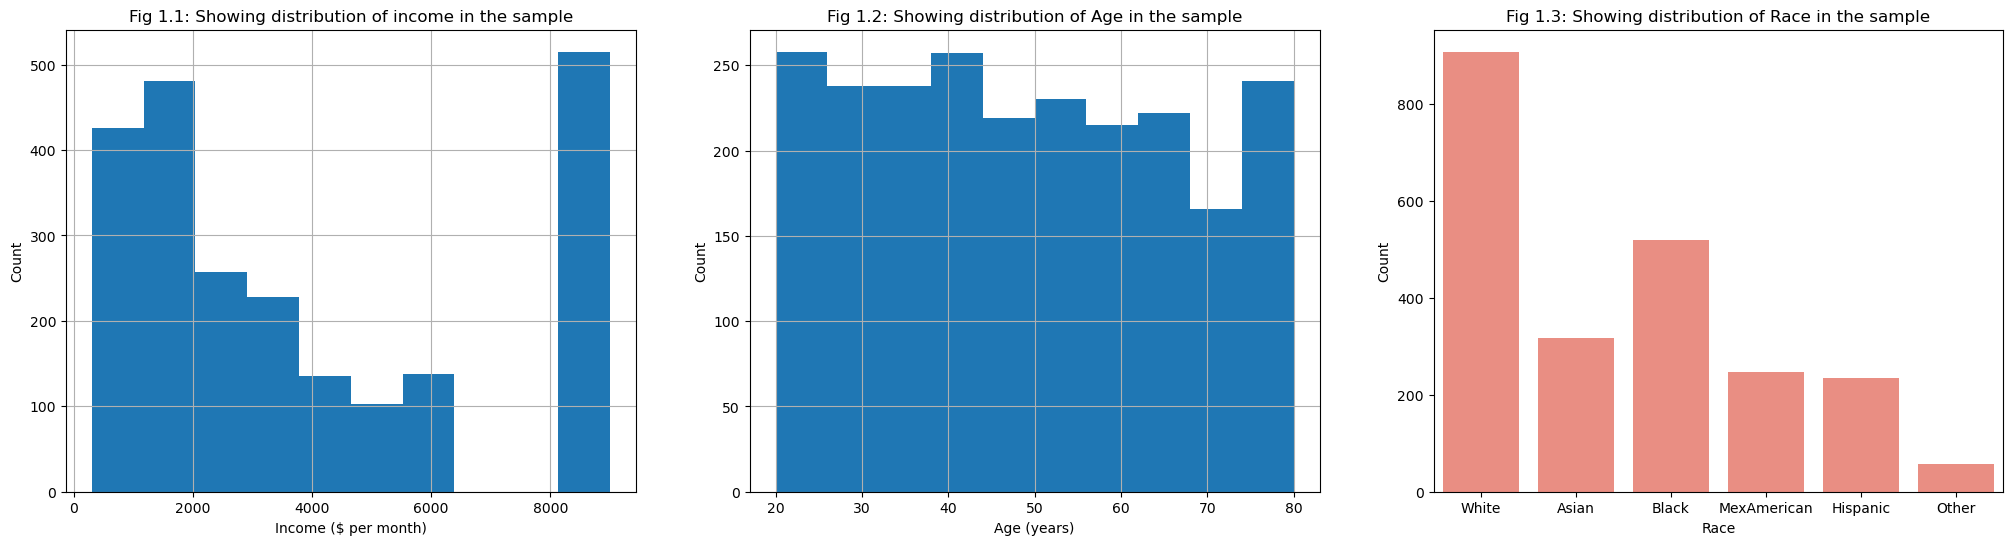

In [58]:

fig=plt.figure(figsize=(25,6))
incomePlot=fig.add_subplot(131)
df['Income'].hist().set(ylabel="Count",xlabel="Income ($ per month)",title='Fig 1.1: Showing distribution of income in the sample')


agePlot=fig.add_subplot(132)
df['Age'].hist().set(ylabel="Count",xlabel="Age (years)",title='Fig 1.2: Showing distribution of Age in the sample')


racePlot=fig.add_subplot(133)
p= sns.countplot(x = 'Race', data = df,color="salmon")
p=p.set(ylabel="Count",xlabel="Race",title='Fig 1.3: Showing distribution of Race in the sample')

plt.show()



From above, we can see that we have data for almost all the age ranges and it's distributed uniformly meaning we have equals amount of data for every age range. The income is not distributed uniformly rather we have more people with lower or higher income but this won't affect our analysis. For the races, we have enough data for the given five races.

<p style="font-size:medium">Since we cleaned the data, now we are going to analyze the data and try to answer our questions.<p>
<h5 style="color:#1E90FF;font-weight:bold"> 1. Does Income has any relation with development of metabiolic syndrome?</h5>
<p style="font-size:medium">In this section, we will analyze whether there is a relationship between income levels and the diagnosis of metabolic syndrome. We are going to add a new category in our data which divides people into three categories: Low (people who have a monthly family income less than $3000), Medium (people who have a monthly family income of $3000 or greater but less than $ 6000), and High (people who have a monthly family income greater than $6000). We are also going to plot a boxplot for people’s income and whether they have metabolic syndrome or not. Then we gonna compare the median income for both (our data is skewed so the median will give us a more accurate measure of centrality than the mean) . In the end, we will find out how many people from different income levels have the syndrome and then calculate the ratios for those.</p>

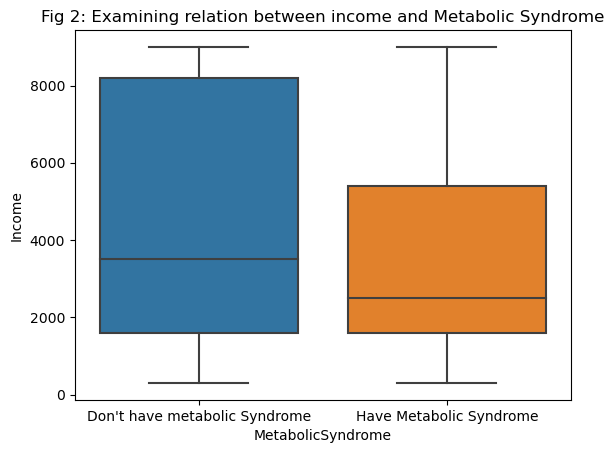

The median income of people who have metabolic syndrome is $2500.0.
The median income of people who don't have metabolic syndrome is $3500.0.


In [59]:
df['IncomeLevel']="Low"
for index, row in df.iterrows():
    if row.Income<3000:
        df.at[index,'IncomeLevel']="Low"
    elif(row.Income>=3000 and row.Income<6000):
        df.at[index,'IncomeLevel']="Middle"
    else:
        df.at[index,'IncomeLevel']="High"

p=sns.boxplot(x='MetabolicSyndrome', y='Income', data=df)
p.set(title="Fig 2: Examining relation between income and Metabolic Syndrome")
p.set_xticklabels(("Don't have metabolic Syndrome","Have Metabolic Syndrome"))
plt.show()
print(f'The median income of people who have metabolic syndrome is ${df[df["MetabolicSyndrome"]==1].Income.median()}.')
print(f"The median income of people who don't have metabolic syndrome is ${df[df['MetabolicSyndrome']==0].Income.median()}.")


In [60]:
IncomeDataFrame=df.groupby(["MetabolicSyndrome","IncomeLevel"]).size().unstack()

display(IncomeDataFrame)
print(f'About {IncomeDataFrame.High.iloc[1]/IncomeDataFrame.High.sum()*100:.2f}% high income Earner has metabolic syndrome')
print(f'About {IncomeDataFrame.Middle.iloc[1]/IncomeDataFrame.Middle.sum()*100:.2f}%  middle range income Earner has metabolic syndrome')
print(f'About {IncomeDataFrame.Low.iloc[1]/IncomeDataFrame.Low.sum()*100:.2f}% Low income Earner has metabolic syndrome')


IncomeLevel,High,Low,Middle
MetabolicSyndrome,,,
0,464,730,303
1,189,434,164


About 28.94% high income Earner has metabolic syndrome
About 35.12%  middle range income Earner has metabolic syndrome
About 37.29% Low income Earner has metabolic syndrome


<p style="font-size: medium">From the above analysis, we can see that the median income for people who have the syndrome is lower than for people who don’t have metabolic syndrome. In the box plot, it is evident that the income is generally lower for most people who have metabolic syndrome. Additionally, the ratio of people with metabolic syndrome at low and medium income levels is higher than those with high income levels. We can conclude that more people with low income levels have metabolic syndrome than those with higher income. This could be due to their diet (which is related to income) or other factors influenced by income levels.</p>

<h5 style="color:#1E90FF;font-weight:bold"> 2. Does gender have any influence overall?</h5>
<p style="font-size:medium">In this section, we are going to analyze if we see any relation between gender and diagnose of metabolic syndrome. First we are going to see the numbers and ratios of people who have metabolic syndrome for each gender and then going to plot a graph for the numbers. </p>

In [61]:
genderGroupby=df.groupby(["MetabolicSyndrome","Sex"]).size().unstack()
display(genderGroupby)

print(f'About {(genderGroupby.Female.iloc[1]/genderGroupby.Female.sum())*100:.2f}% of females have metabolic syndrome')
print(f'About {(genderGroupby.Male.iloc[1]/genderGroupby.Male.sum())*100:.2f} of males have metabolic syndrome.')

Sex,Female,Male
MetabolicSyndrome,,
0,772,725
1,387,400


About 33.39% of females have metabolic syndrome
About 35.56 of males have metabolic syndrome.


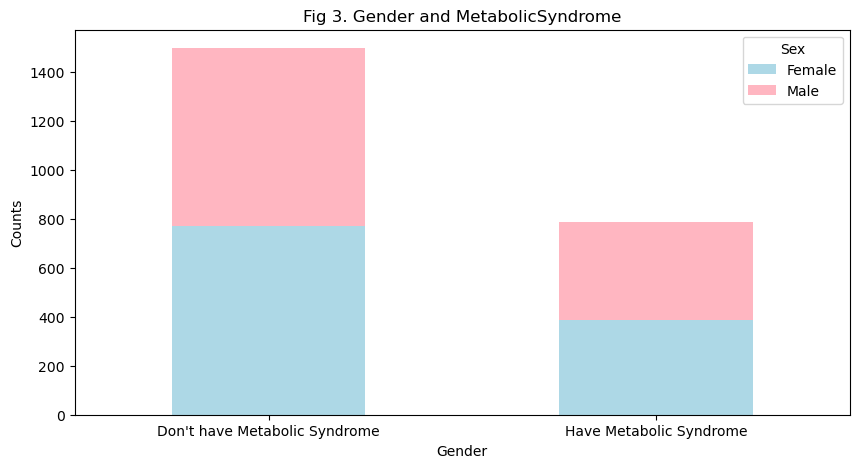

In [62]:
genderBarplot = genderGroupby.plot.bar(stacked=True, color = ["lightblue", "lightpink"], 
figsize=(10,5), title="Fig 3. Gender and MetabolicSyndrome",ylabel="Counts",xlabel="Gender")
plt.xticks(rotation=0)
genderBarplot.set_xticklabels(("Don't have Metabolic Syndrome","Have Metabolic Syndrome"))
plt.show(genderBarplot)

<p>From above, we can see that the ratio of people who have metabolic syndrome for each gender is almost similar, also from the graph we can analyze that almost equal number of females and males have metabolic syndrome. In this data, we hardly see whether one gender have higher chances of getting metabolic syndrome or not.</p>

<h5 style="color:#1E90FF;font-weight:bold"> 3. Does age has any influence on it and what biological factor changes most with age which can chnage the likehood of developing the Syndrome. </h5>
<p style="font-size:medium">In this section, we are going to analyze the relation between diagnose of metabloic syndrome and age. If there is relation between both, we will further analyze what biological factors changes with ages?
To analyze the relation between the age and metabolic syndrome, we will plot a violin graph for age and whether they have metabolic syndrome or not. Then we will analyze the summary stats for age for both the categories</p>

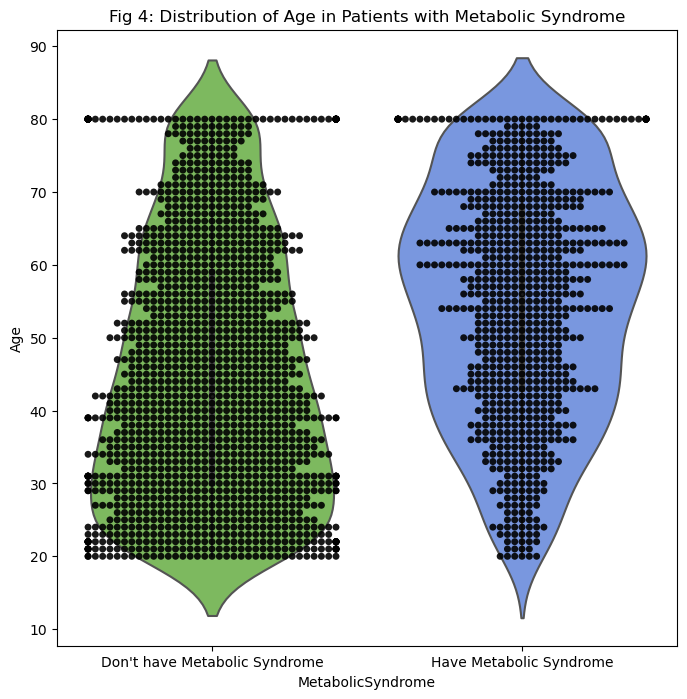

 Out of 821 people who are below 40, only 159 have metabolic syndrome, 
 However, Out of 1422 people who are above 40, 615 have metabolic syndrome


In [63]:
violinG=plt.figure(figsize=(8,8))
violinG=sns.violinplot(y=df.Age, x=df.MetabolicSyndrome, palette=['#78C850','#6890F0'])
sns.swarmplot(x=df.MetabolicSyndrome, y=df.Age, color="k", alpha=0.9)
violinG.set_title("Fig 4: Distribution of Age in Patients with Metabolic Syndrome")
violinG.set_xticklabels(("Don't have Metabolic Syndrome","Have Metabolic Syndrome"))
plt.show()

print(f' Out of {df[df.Age<40].Age.count()} people who are below 40, only {df[df.Age<40][df[df.Age<40].MetabolicSyndrome==1].Age.count()} have metabolic syndrome, \n However, Out'
    +f' of {df[df.Age>40].Age.count()} people who are above 40, {df[df.Age>40][df[df.Age>40].MetabolicSyndrome==1].Age.count()} have metabolic syndrome')


In [64]:
print(f'Age Summary Statics for people who have Metabolic Syndrome \n{df[df.MetabolicSyndrome==1].Age.describe().round(0)} \n')
print(f"Age Summary Statics for people who don't have Metabolic Syndrome \n{df[df.MetabolicSyndrome==0].Age.describe().round(0)} \n")

Age Summary Statics for people who have Metabolic Syndrome 
count    787.0
mean      55.0
std       16.0
min       20.0
25%       43.0
50%       56.0
75%       68.0
max       80.0
Name: Age, dtype: float64 

Age Summary Statics for people who don't have Metabolic Syndrome 
count    1497.0
mean       45.0
std        18.0
min        20.0
25%        30.0
50%        42.0
75%        59.0
max        80.0
Name: Age, dtype: float64 



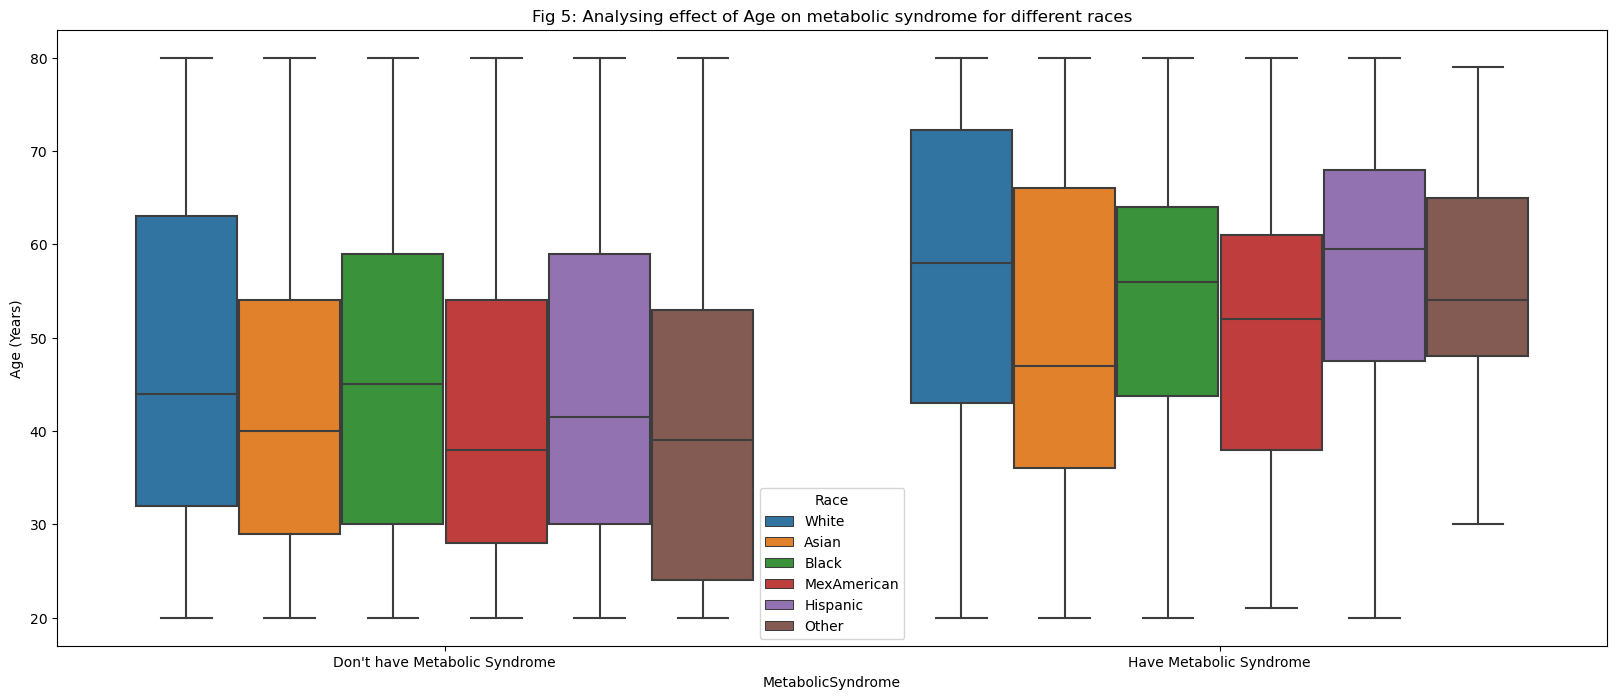

In [65]:
fig,ax=plt.subplots(figsize=(20,8))
p=sns.boxplot(data=df,x="MetabolicSyndrome",y="Age",hue="Race").set(title="Fig 5: Analysing effect of Age on metabolic syndrome for different races", ylabel="Age (Years)")
ax.set_xticklabels(("Don't have Metabolic Syndrome","Have Metabolic Syndrome"))
plt.show()

<div style="font-size: medium">
  <p>From the above, we can see that more older people have metabolic syndrome compared to young people. As age increases, the number of people who have metabolic syndrome also increases. From the summary stats, we can analyze that the average age for people who have the syndrome is 55, with only 25% of people in this category being less than 43 years old. The standard deviation is also around 16, which further reveals that the age range for people who have metabolic syndrome tends to stay above 40.</p>
  <p>On the contrary, people who don’t have metabolic syndrome have an average age of 45 and a median of 42 years, with a standard deviation of 18. So from the graph, we can see that there is a relation between age and whether they have metabolic syndrome or not. People with higher age tend to have metabolic syndrome, and people with lower age have fewer cases of metabolic syndrome.</p>
  <p>The last boxplots also show that for all the races, the average age for people who have the syndrome is higher than those who don't. Which further confirms that age and the diagnosis of the syndrome do have a relation between them.</p>
  <p>So, what changes with age? Metabolic syndrome is caused by a number of reasons, but now we are trying to see if there is a particular biological component that changes with age which is related to the syndrome diagnosis.</p>
</div>


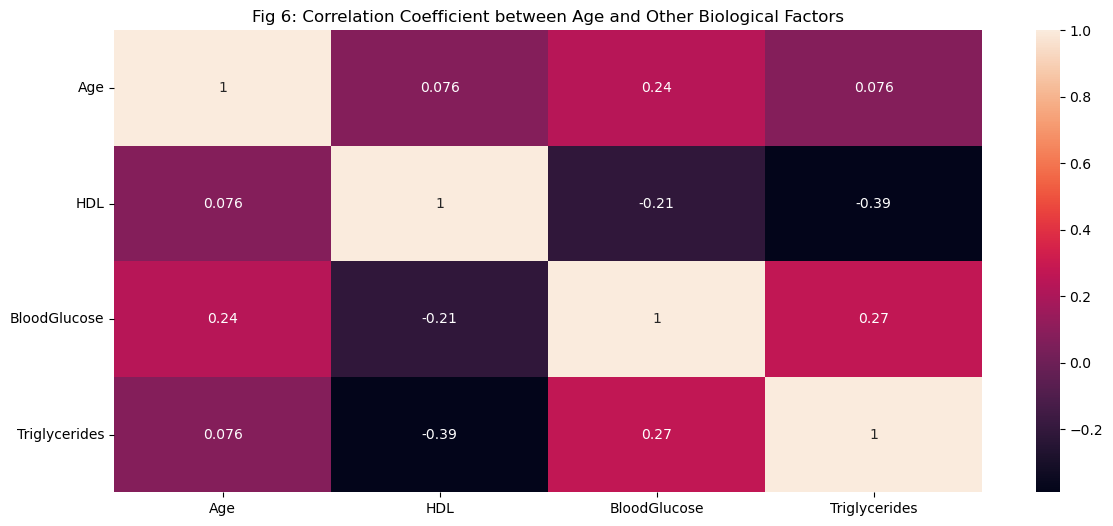

In [66]:
plt.figure(figsize=(14,6))
sns.heatmap(df[['Age','HDL','BloodGlucose','Triglycerides']].corr(),annot=True).set(title="Fig 6: Correlation Coefficient between Age and Other Biological Factors")
plt.yticks(rotation="0")
plt.show()


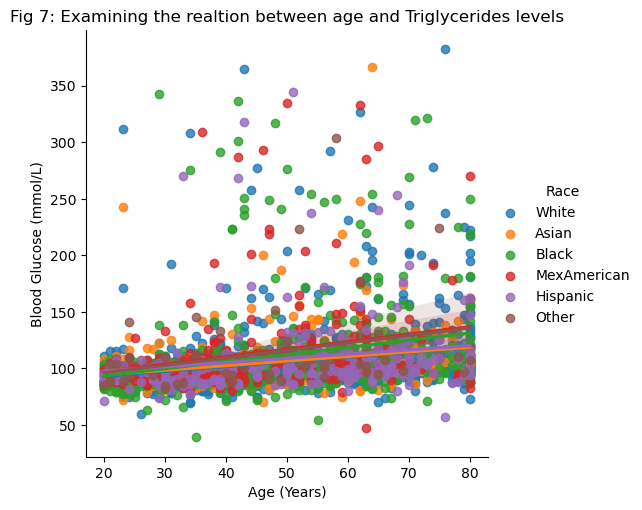

In [67]:
sns.lmplot(y="BloodGlucose", x="Age",data=df,hue="Race").set(title="Fig 7: Examining the realtion between age and Triglycerides levels",xlabel="Age (Years)", ylabel="Blood Glucose (mmol/L)")
plt.show()

<p style="font-size: medium">Above, we tried to see if there is a particular biological factor that changes with age, contributing to a higher number of patients getting the syndrome. Fig 6 measures the correlation coefficient between age and another biological factor. If it's close to 1, it shows a strong positive relationship; close to zero indicates no relationship, or close to -1 signifies a strong negative relationship. We observe a weak positive relationship between age and blood glucose levels. We then plotted a scatter graph between age and blood glucose, and we observe the same relationship across different races. We can conclude that there is a weak positive relationship between blood glucose and age.</p>

<p>Even though there is a relationship between these, it doesn't indicate that this is the only reason why age and the diagnosis of metabolic syndrome have a positive relationship. There might be other factors that change with age as well. But we can draw a conclusion that with age, blood glucose and the chances of getting metabolic syndrome tend to increase.</p>


<h5 style="color:#1E90FF;font-weight:bold"> 4. Does Race of a person affects the chances of developing the syndrome? Does different gender in different races have different impacts on the likelihood of developing the syndrome?  </h5>
<p style="font-size:medium">In this section, we are going to analyze if certain races have higher ratios for people who have metabolic syndrome. Then we are going to draw a graph which tells us about the count of the people for each race who have metabolic syndrome and who don't have metabolic syndrome. In the end we are going to analyze if different gender in different races could have different ratios for the people who have metabolic syndrome. </p>

In [68]:
raceGroupby=df.groupby(['MetabolicSyndrome','Race']).size().unstack()
display(raceGroupby)

def givePercentage(race):
    print(f"Almost {(raceGroupby[race][1]/raceGroupby[race].sum())*100:.2f}% of people of {race} descent have metabolic Syndrome")

for item in df.Race.unique():
    givePercentage(item)

Race,Asian,Black,Hispanic,MexAmerican,Other,White
MetabolicSyndrome,,,,,,
0,241,351,138,146,41,580
1,77,168,96,101,17,328


Almost 36.12% of people of White descent have metabolic Syndrome
Almost 24.21% of people of Asian descent have metabolic Syndrome
Almost 32.37% of people of Black descent have metabolic Syndrome
Almost 40.89% of people of MexAmerican descent have metabolic Syndrome
Almost 41.03% of people of Hispanic descent have metabolic Syndrome
Almost 29.31% of people of Other descent have metabolic Syndrome


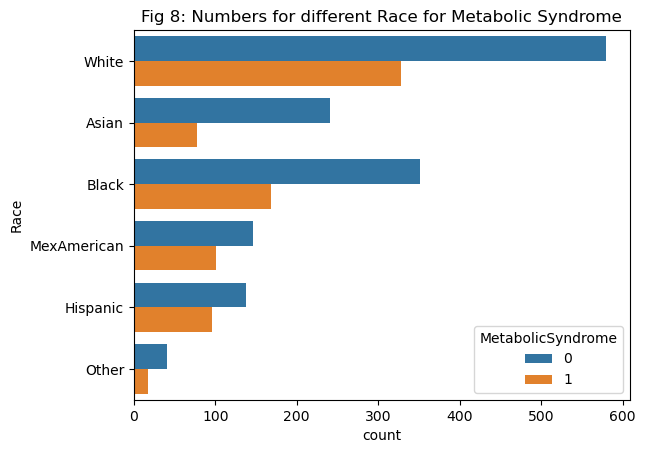

In [69]:
countplot = sns.countplot(data=df, y="Race", hue="MetabolicSyndrome").set(title='Fig 8: Numbers for different Race for Metabolic Syndrome')

<p style="font-size:medium">From above numbers we can analyze that the percenatge of people who have metabolic syndrome is highest among people of Hispanic and Mexican American descents. Asian people have lowest percentage of people who have metabolic syndrome. So this shows that for each race, the chances of having metabolic syndrome is different so there is a relation between a patient's race and whether they are going to have metabolic syndrome or not. The bar graph shows the same, analyze that for some races, it shows higher relative count of people who have metabolic syndrome wheresas for other the relative count is much less</p>

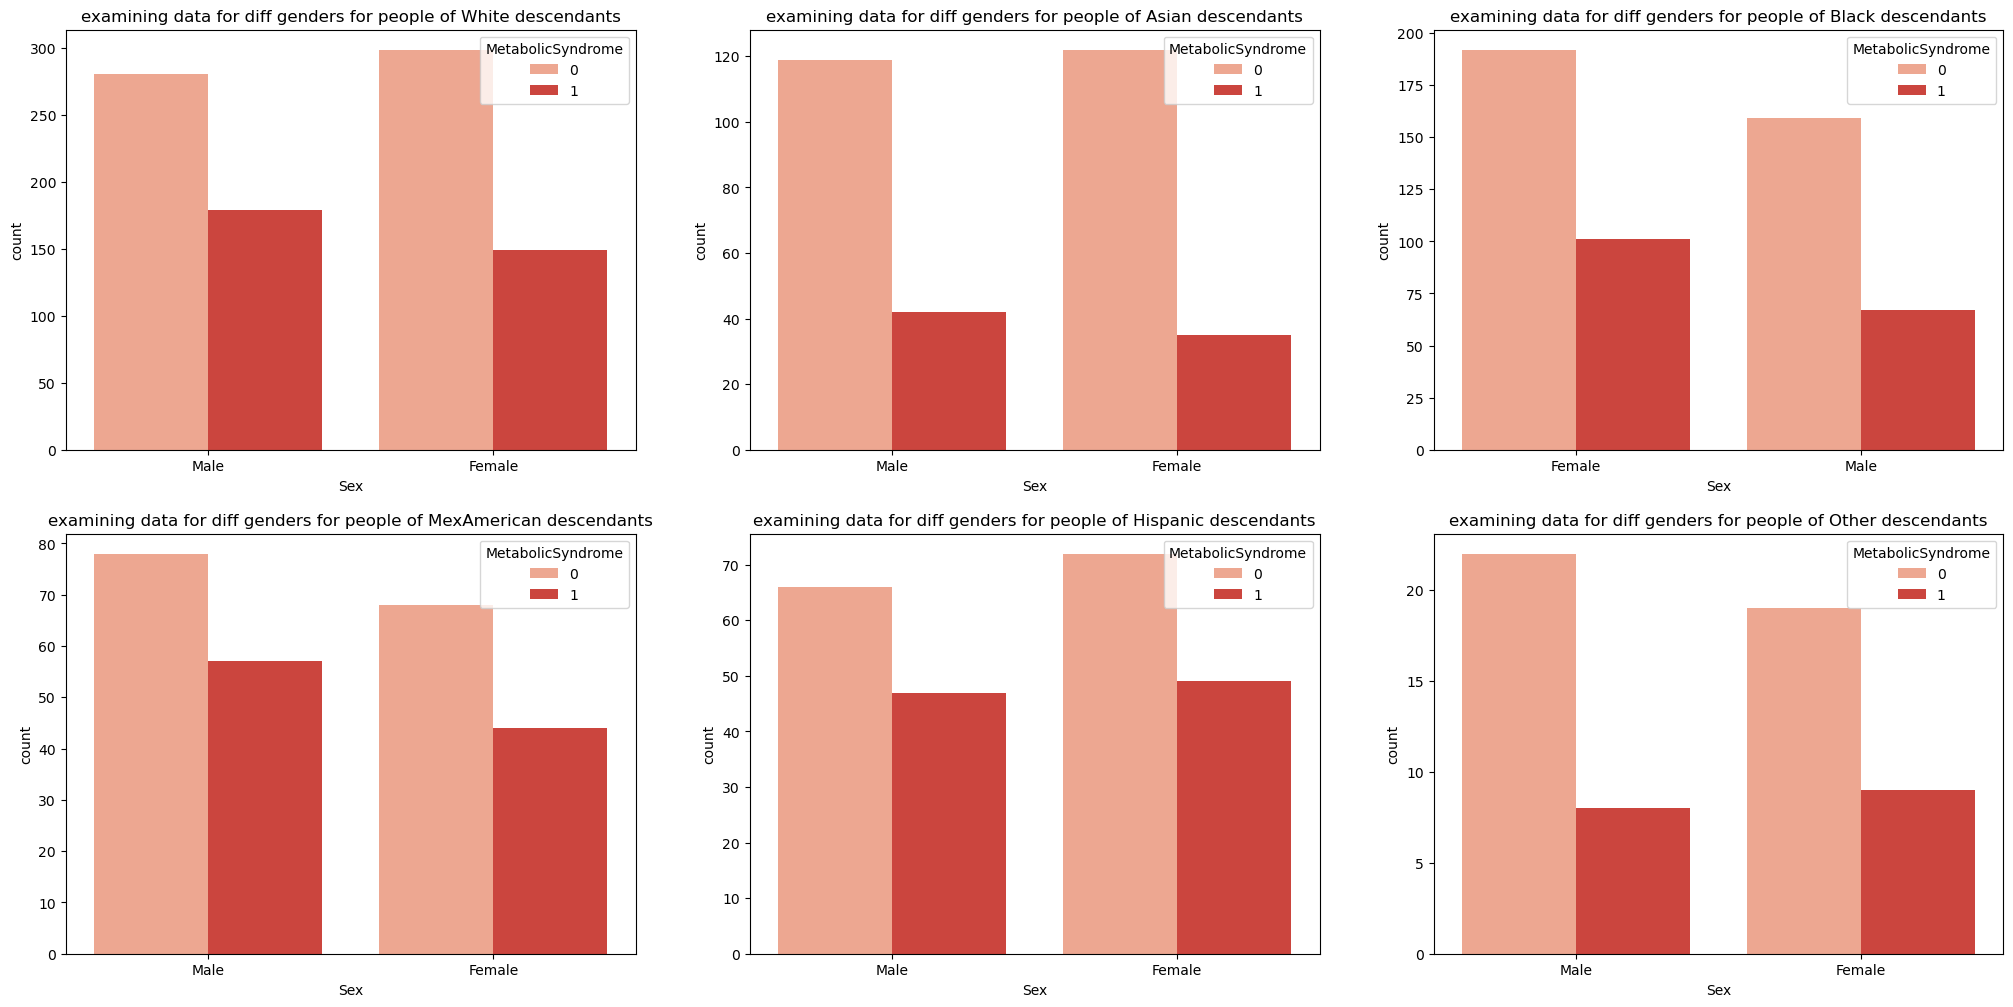

In [70]:
def drawGraphForGender(race,n):
    plot=fig.add_subplot(n)
    sns.countplot(data=df[df.Race==race], x="Sex", hue="MetabolicSyndrome" , palette='Reds').set(title=f'examining'+
    f' data for diff genders for people of {race} descendants')

fig=plt.figure( figsize=(25,12))
n=231
for item in df.Race.unique():
    drawGraphForGender(item,n)
    n=n+1
plt.show()

<p style="font-size: medium">The above bar graphs show the count of people who have metabolic syndrome for different genders and races. Overall, we see that there is no relationship between gender and the diagnosis of metabolic syndrome. The trend appears to stay the same, with not a lot of differences in counts of different genders for different races. According to this data, there doesn't seem to be any relationship between gender and the diagnosis of metabolic syndrome.</p>


<h2 style="color:#006400; font-weight:bold; font-family: Open Sans, sans-serif; margin-bottom:5px;">Discussion</h2>
<h5 style="color:#1E90FF; font-weight:bold;">Summary of Analyses</h5>
<p style="font-size:medium">In this assignment, we explored the relationships between demographic factors and metabolic syndrome. We analyzed if the diagnosis of metabolic syndrome is related to income, gender, age, and race. Below is a brief summary of each of our findings:</p>

<ol style="font-size:medium;">
  <li>
    <h5 style="color:#1E90FF; margin-bottom:0; font-size:medium;">Income and Metabolic Syndrome:</h5>
    <p style="margin-top:0;">Metabolic syndrome does show a relationship with income. Individuals with lower income tend to have more cases of metabolic syndrome compared to high-income earners. The average earnings for people with the syndrome are $2500/month, whereas it's $3500/month for those without the syndrome. Additionally, from Figure 2, we observed that income levels for most people with the syndrome are on the lower end, with 75% people earning only $5000 or less for the group. This provides enough evidence to conclude that high-income earners have fewer chances of developing the syndrome compared to those earning less than $3000/month. It's also evident that income doesn't directly relate to the development of the syndrome but might influence other factors like diet or lifestyle choices, which can affect the chances of developing the syndrome.</p>
  </li>

  <li>
    <h5 style="color:#1E90FF; margin-bottom:0; font-size:medium;">Gender and Metabolic Syndrome:</h5>
    <p style="margin-top:0;">There seems to be no significant pattern between the gender of patients and the diagnosis of metabolic syndrome. The ratio of females with the syndrome to the total number of females is almost 0.33, which is similar to the ratio for males, which is almost 0.35. We also plotted a graph to observe any significant differences, but there was no noticeable pattern between these two factors for the given data.</p>
  </li>

  <li>
    <h5 style="color:#1E90FF; margin-bottom:0; font-size:medium;">Age and Metabolic Syndrome:</h5>
    <p style="margin-top:0;">We observed a relationship between age and metabolic syndrome. The mean age for people with the syndrome is 55 years, compared to 45 years for those without the syndrome. Only 25% of people with the syndrome are below 43 years old. In Figure 4, we observed that the number of people with the syndrome increased with age. We also drew a box plot for all races comparing age and metabolic syndrome, and for all racial groups, the median age is higher for people with metabolic syndrome compared to the group without. In the final analysis, we attempted to determine which biological factor changes with age that is related to metabolic syndrome and found a weak relationship between age and blood glucose with a correlation coefficient of 0.24. We further confirmed this relationship by drawing a scatter plot (Figure 7) between blood glucose levels and age for all races. In conclusion, we can say that with age, the chances of people having metabolic syndrome increase, as well as blood glucose levels. However, the increase in blood glucose might not be the only factor contributing to the higher number of patients with metabolic syndrome as age increases.</p>
  </li>

  <li>
    <h5 style="color:#1E90FF; margin-bottom:0; font-size:medium;">Race and Metabolic Syndrome:</h5>
    <p style="margin-top:0;">In the last part of this assignment, we observed whether there are higher numbers of patients for some races compared to others. We found that people of Hispanic and Mexican American descents have a higher percentage of individuals with metabolic syndrome, amounting to 41.03% and 40.89%, respectively. The lowest was observed among people of Asian descent, which is only 24.21%. We then plotted a bar graph (Figure 8) to visually analyze these differences, and it's evident that the numbers vary for all races, with some having a relatively high number of people compared to others. We also attempted to see if there is any significant pattern for different genders within different races and metabolic syndrome. We plotted a bar graphs for each race, but we hardly see any pattern; the ratio for both genders is almost the same for all races. In conclusion, we observed that the number of people with metabolic syndrome is higher in some races than others, indicating that the development of metabolic syndrome does depend on a person's race.</p>
  </li>
</ol>


<h2 style="color:#006400;font-weight:bold; font-family: Open Sans, sans-serif; margin-bottom:5px;">References</h2>
<ol style="font-size:medium">
<li>  Normal value ranges for different biological factors: <a href="https://mcc.ca/objectives/normal-values/">https://mcc.ca/objectives/normal-values/</a></li>
<li>  Information about Metabolic Syndrome: <a href="https://mcc.ca/objectives/normal-values/">https://mcc.ca/objectives/normal-values/</a></li>
<li>  Data Source: <a href="https://www.kaggle.com/datasets/antimoni/metabolic-syndrome">https://www.kaggle.com/datasets/antimoni/metabolic-syndrome</a></li> 
<li>  Original Data Sources: <a href="https://www.cdc.gov/nchs/nhanes/index.html">https://www.cdc.gov/nchs/nhanes/index.html</a></li>
<li>  Different libraries used:
<ul>
    <li>Seaborn</li>
     <li>Matplotlib</li>
      <li>Pandas</li>
       <li>Numpy</li>
</ul>
</li>
</ol>